In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")


In [3]:
data=pd.read_csv('viva_credit.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<AxesSubplot:>

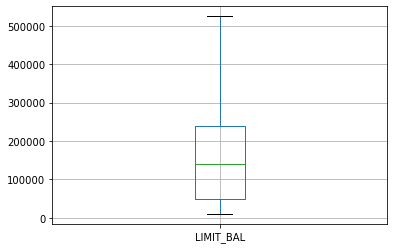

In [31]:
data.boxplot('LIMIT_BAL')

<AxesSubplot:xlabel='SEX', ylabel='count'>

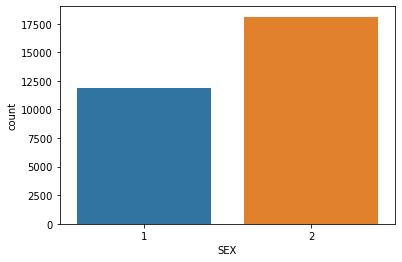

In [7]:
sns.countplot(x="SEX", data=data)

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

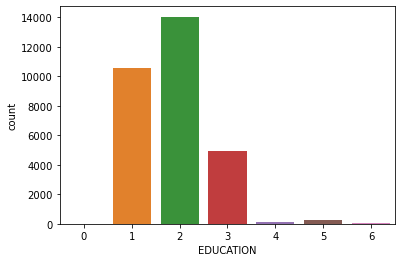

In [8]:
sns.countplot(x="EDUCATION", data=data)

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

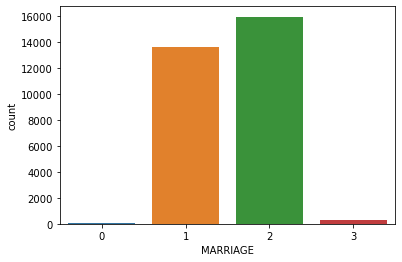

In [9]:
sns.countplot(x="MARRIAGE", data=data)

<AxesSubplot:>

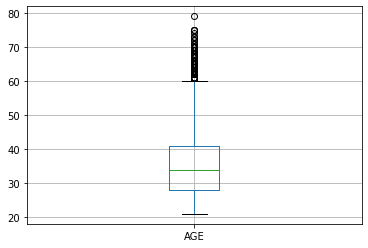

In [11]:
data.boxplot('AGE')

(array([5.127e+03, 8.261e+03, 6.514e+03, 4.812e+03, 2.606e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <BarContainer object of 10 artists>)

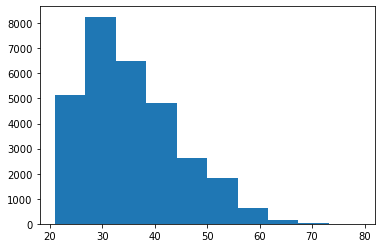

In [12]:
plt.hist(data['AGE'])

<AxesSubplot:xlabel='AGE', ylabel='default.payment.next.month'>

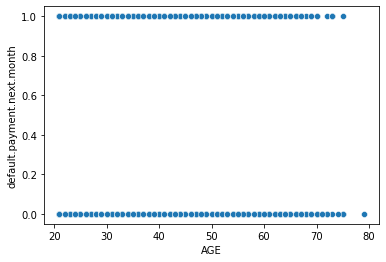

In [15]:
sns.scatterplot(x='AGE',y='default.payment.next.month',data=data)

<AxesSubplot:xlabel='SEX', ylabel='default.payment.next.month'>

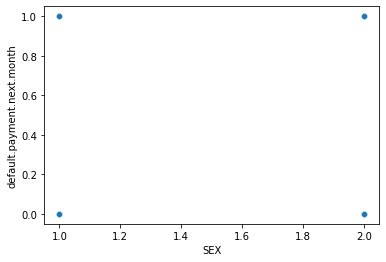

In [16]:
sns.scatterplot(x='SEX',y='default.payment.next.month',data=data)

<AxesSubplot:xlabel='EDUCATION', ylabel='default.payment.next.month'>

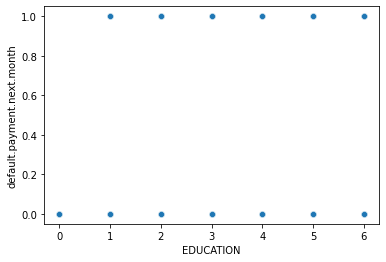

In [17]:
sns.scatterplot(x='EDUCATION',y='default.payment.next.month',data=data)

<AxesSubplot:xlabel='MARRIAGE', ylabel='default.payment.next.month'>

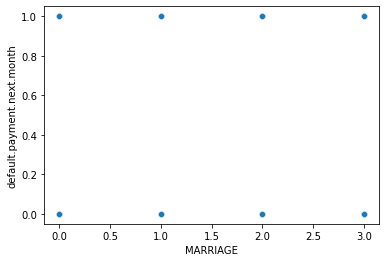

In [18]:
sns.scatterplot(x='MARRIAGE',y='default.payment.next.month',data=data)

<AxesSubplot:xlabel='SEX', ylabel='default.payment.next.month'>

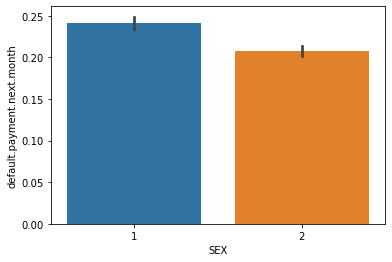

In [20]:
sns.barplot(x='SEX',y='default.payment.next.month',data=data)

<AxesSubplot:xlabel='EDUCATION', ylabel='default.payment.next.month'>

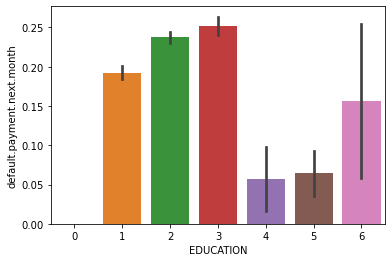

In [21]:
sns.barplot(x='EDUCATION',y='default.payment.next.month',data=data)

<AxesSubplot:xlabel='MARRIAGE', ylabel='default.payment.next.month'>

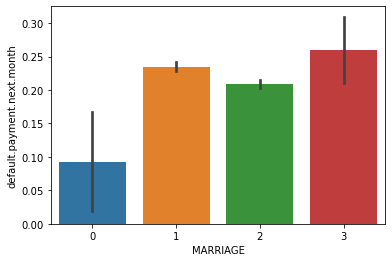

In [22]:
sns.barplot(x='MARRIAGE',y='default.payment.next.month',data=data)

In [13]:
data.drop('ID',axis=1,inplace=True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [23]:
data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [24]:
IQR_LIM=data['LIMIT_BAL'].quantile(q=0.75)-data['LIMIT_BAL'].quantile(q=0.25)
IQR_LIM

190000.0

In [26]:
UL_LIM=data['LIMIT_BAL'].quantile(q=0.75)+1.5*IQR_LIM
UL_LIM

525000.0

In [28]:
data['LIMIT_BAL'].quantile(np.arange(0,1,0.02))

0.00     10000.0
0.02     20000.0
0.04     20000.0
0.06     20000.0
0.08     20000.0
0.10     30000.0
0.12     30000.0
0.14     40000.0
0.16     50000.0
0.18     50000.0
0.20     50000.0
0.22     50000.0
0.24     50000.0
0.26     60000.0
0.28     60000.0
0.30     70000.0
0.32     80000.0
0.34     80000.0
0.36     90000.0
0.38     90000.0
0.40    100000.0
0.42    110000.0
0.44    120000.0
0.46    120000.0
0.48    130000.0
0.50    140000.0
0.52    150000.0
0.54    150000.0
0.56    160000.0
0.58    170000.0
0.60    180000.0
0.62    180000.0
0.64    200000.0
0.66    200000.0
0.68    210000.0
0.70    210000.0
0.72    230000.0
0.74    230000.0
0.76    240000.0
0.78    260000.0
0.80    270000.0
0.82    290000.0
0.84    300000.0
0.86    320000.0
0.88    340000.0
0.90    360000.0
0.92    380000.0
0.94    410000.0
0.96    460000.0
0.98    500000.0
Name: LIMIT_BAL, dtype: float64

In [30]:
for i in data['LIMIT_BAL'].index:
    if data['LIMIT_BAL'][i]>UL_LIM:
        data['LIMIT_BAL'][i]=UL_LIM

In [33]:
data['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [34]:
IQR_AGE=data['AGE'].quantile(q=0.75)-data['AGE'].quantile(q=0.25)
UL_AGE=data['AGE'].quantile(q=0.75)+1.5*IQR_AGE
for i in data['AGE'].index:
    if data['AGE'][i]>UL_AGE:
        data['AGE'][i]=UL_AGE

<AxesSubplot:>

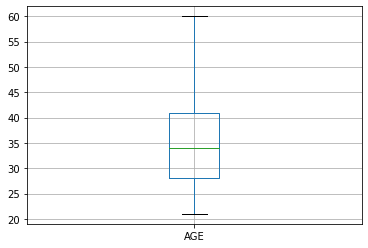

In [35]:
data.boxplot('AGE')

In [36]:
X=data[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [37]:
y=data['default.payment.next.month']

In [38]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=0)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)
acclr = round(accuracy_score(ypred, ytest) * 100, 2)
cmlr=confusion_matrix(ytest,ypred)
print('accuracy score is ',acclr)
print('confusion matrix is ',cmlr)
print(metrics.classification_report(ytest,ypred))

accuracy score is  78.24
confusion matrix is  [[5868    0]
 [1632    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5868
           1       0.00      0.00      0.00      1632

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.69      7500

